<a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-header&utm_campaign=2023-11-NLPWebinar"><center><img src="./assets/banner.png"></center></a>

## Learn natural language processing. From A to Z. From zero to hero. Fast.

Copyright, NLP from scratch, 2023.

[nlpfromscratch.com](https://www.nlpfromscratch.com)

------------

# Webinar #1 - Zero to NLP in 60

## Introduction 🎬
In this notebook, we will rapidly through multiple areas in the field of natural language processing, and show it is easy to accomplish many of the common [NLP tasks](https://en.wikipedia.org/wiki/Natural_language_processing#Common_NLP_tasks) using the open source libraries that exist today and only a few simple lines of code!

This notebook is best run in [Google Colab](https://colab.research.google.com/), where the majority of dependencies are already installed. However, if you wish to run the notebook locally, please follow the [directions for setting up a local environment](https://drive.google.com/file/d/1EV1seK-dUHRCzj2EDuu3ETAhUyjzOGRd/view?usp=drive_link) and you may then download the notebook as a `.ipynb` and run in either Jupyter or Jupyterlab.

This notebook uses a number of helpful data science and machine learning libraries in addtion to base python, which come installed with Google Colab by default. These would need to be installed locally using `pip` or another python package manager if you are going to download and run this notebook outside of Colab.
- The `pandas` library, for data manipulation and working with structured data
- The `matplotlib` library, for visualizating data
- The `scikit-learn` library, for machine learning and text data preprocessing

## Machine Learning for Sentiment Analysis 🤖🧠😀

Here we will be apply supervised learning machine learning to a sentiment analysis problem by training a model on labelled data. In particular, we will training one of the simplest types of models, [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression), a type of linear classifier.  First we will load and preprocess a labelled text dataset, then fit and use this simple linear model for the binary classification task of positive and negative sentiment.

Here we be working a random 10% sample of the [Large Movie Review Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), a set of 50,000 "highly polar" movie reviews collected from the [Internet Movie Database](https://www.imdb.com).

First, we'll read in the data:

In [ ]:
import pandas as pd

# Download the file from Github
reviews_df = pd.read_csv('https://raw.githubusercontent.com/nlpfromscratch/datasets/master/imdb/imdb_reviews_sample.csv')

As before, we'll need to preprocess our data before we do machine learning. Let's take a look at the data and see what we are working with:

In [ ]:
# How many reviews?
reviews_df.shape

(5000, 2)

Here we are working with 5,000 movie reviews with two columns of data for each record. Let's take a look at a sample of the data:

In [ ]:
reviews_df.head()

,review,sentiment
0,Valley Girl is an exceptionally well made film...,1
1,This is one of those inoffensive and mildly en...,0
2,I really wanted to like this movie - the locat...,0
3,I attended the premier last night. The movie s...,0
4,The Deadly Wake is THE PERFECT MOVIE for film ...,0


We can see that the there are two columns, the free-form text in the column `review`, and the sentiment class label in the column `sentiment`, with a zero (0) for negative reviews and one (1) for positive reviews. We can also see that we'll need to do some text preprocessing, as there are different letter cases and punctuation present in the review text:

In [ ]:
# First 1K characters of the first review
display(reviews_df['review'][0][0:1000])

'Valley Girl is an exceptionally well made film with an all-around great cast. Even though the dialogue is a bit dated now, when the movie was released it was very hip. To this day, I know many people (teenagers included) that cannot form a sentence without using the word "like". That is without a doubt the legacy this movie will leave. A rating of 8 was given for this, like, most excellent movie.'

Because we have already covered preprocessing above, we will gloss over the details here and apply the necessary steps all at once. Only here now, we are applying the preprocessing steps to all documents (reviews) in our corpus, instead of a single piece of text.

In [ ]:
# Make a copy of the original dataframe
processed_df = reviews_df.copy()

# Change everything to lowercase
processed_df['review'] = processed_df['review'].str.lower()

# Remove punctuation with regular expression
processed_df['review'] = processed_df['review'].str.replace(r'[^\w\s]+', '')

# Check
processed_df.head()

<ipython-input-45-8988d84c8c5e>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_df['review'] = processed_df['review'].str.replace(r'[^\w\s]+', '')


,review,sentiment
0,valley girl is an exceptionally well made film...,1
1,this is one of those inoffensive and mildly en...,0
2,i really wanted to like this movie the locati...,0
3,i attended the premier last night the movie st...,0
4,the deadly wake is the perfect movie for film ...,0


Now we have normalized all 5K movie reviews with only a few lines of code!

Let's check the result on the first movie review:

In [ ]:
# Check
processed_df['review'][0][0:1000]

'valley girl is an exceptionally well made film with an allaround great cast even though the dialogue is a bit dated now when the movie was released it was very hip to this day i know many people teenagers included that cannot form a sentence without using the word like that is without a doubt the legacy this movie will leave a rating of 8 was given for this like most excellent movie'

Looks good, now we can apply vectorization via sklearn, to get numeric data suitable for machine learning, as we did in the previous section:

In [ ]:
# Apply count vectorization and remove stopwords
# Use the min_df parameter to only keep tokens which appear in at least 1% of documents (50 reviews or more)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', min_df=0.01)
X = cv.fit_transform(reviews_df['review'])
X

<5000x1565 sparse matrix of type '<class 'numpy.int64'>'
	with 269110 stored elements in Compressed Sparse Row format>

We can see that we have a 5,000 row dataframe with 1,565 columns - which are the features made up of the token counts. Before we only had a single row of data returned, but now we have 5000 rows, 1 for each movie review. This matrix is sparse, so let's convert it to a nice dataframe for convenience. We will also use the tokens stored in the count vectorizer as the feature names to be the column names as seen previously:

In [ ]:
X = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())

# Check
X.head()

,10,100,11,12,13,15,20,30,40,50,...,wrong,wrote,yeah,year,years,yes,york,young,younger,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the dataframe is mostly zeros, as most tokens only appear in a very small number of reviews. This matrix numerically describes each movie review. Here we will also pull out the `y` variable which will be our target for the binary classification task:

In [ ]:
y = processed_df['sentiment']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

We now have our preprocessed text data and an associated target, and so we are ready to fit a supervised machine learning model. Together these two will serve as our *training data* for a machine learning model. First we will split our data into a *training set* and a holdout or *test set* which the model does not see, in order to evaluate the performance of our model in an unbiased way. We can do this is in sklearn using the `train_test_split` method which is specifically for this purpose:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now we can fit our model. In scikit-learn, this is as easy as a few lines of code. We first import the `LogisticRegression` model class, then fit it on the training data, then call `.score`, passing in the training and test sets to get back accuracy scores.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
# Use max_iter for convergence, C value to prevent overfitting
logit = LogisticRegression(max_iter=2000, C=0.001)

# Fit the model
logit.fit(X_train, y_train)

# Display the scores on training and test set
display(logit.score(X_train, y_train))
display(logit.score(X_test, y_test))

0.8151428571428572

0.7746666666666666

Here we can see that are model is able to predict the sentiment of a movie review with ~80% accuracy! We could give the model a new movie review and see what its prediction is, assumming we performed the same preprocessing and count vectorization upon it first as we did to the training data.

What might be more interesting is doing some *model introspection*. Since positive sentiment is class 1, the model coefficients which are positive will be more predictive of positive sentiment, and those which are negative more predictive of negative sentiment.

We can take a look at the most predictive features (tokens) below with a few simple lines of code:

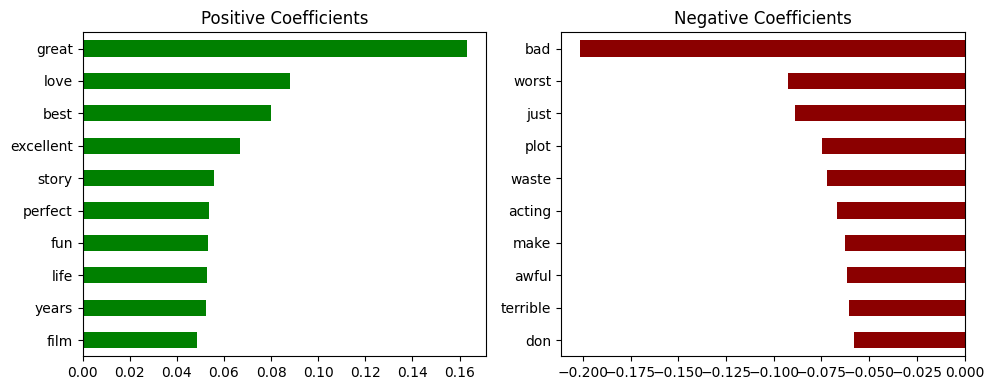

In [ ]:
# Pull out the coefficients and feature names
coef_series = pd.Series(logit.coef_[0], index=cv.get_feature_names_out())

# Plot
import matplotlib.pyplot as plt

plt.subplots(1,2, figsize=(10, 4))

# Positive
plt.subplot(1,2,1)
coef_series.nlargest(10).sort_values().plot(kind='barh', color='green')
plt.title('Positive Coefficients')

# Negative
plt.subplot(1,2,2)
coef_series.nsmallest(10).sort_values(ascending=False).plot(kind='barh', color='darkred')
plt.title('Negative Coefficients')

# Show
plt.tight_layout()
plt.show()

We can see that the words appearing in reviews with positive reviews are highly positive, and those in negative reviews are very negative as we would expect. Some tokens might warrant more further investigation into the data if they are nouns. The model has indeed learned something about the appearance of different tokens (words) and their effect on the sentiment of a movie review.

### Sentiment Analysis with an LLM and "Zero-shot" Learning 🎯

While specific models can be explicitly trained for sentiment scoring, many of the powerful, modern state-of-the-art [large language models](https://en.wikipedia.org/wiki/Large_language_model), or LLMs, are general enough that they can perform sentiment analysis tasks. Referred to as ["zero-shot" learning](https://en.wikipedia.org/wiki/Zero-shot_learning), though some LLMs have never been given explicit instructions in classifying sentiment, they nonetheless can do such a task given their broad knowledge base from the size of the data used in training. Furthermore, some general models for text generation or other tasks can be further fine-tuned on sentiment analysis specific tasks.

While we won't use any code in this section, let's take a look at the very popular [LLaMa v2 70B chat](https://huggingface.co/meta-llama/Llama-2-70b-chat-hf) model from Meta (Facebook) which was released recently in July of 2023. We will use it through the web interface which is made available at [Perplexity Labs](https://labs.perplexity.ai/).

<center><img src="https://drive.google.com/uc?export=download&id=1Z4NtnkYJ8TM1Z1gP2SUg2PPWoz9kZE3D"></center>

**Initial prompt:**
> Classify the sentiment of the following sentence as either negative (CLASS_0) or positive (CLASS_1): "I love absolutely applesauce, it's the best!"

**Follow-up prompt:**
<blockquote>
Could you do the same for the following sentences:

- "I hated this movie, it was the worst."
- "I loved this movie, it was the best."
- "Applesauce is ok, I guess, I don't mind it."
</blockquote>

## Conclusion 🏁

That concludes the webinar for today! I hope you've learned a lot about the fundamentals of natural language processing and what is possible with the tools available to us today, and only a few lines of code here or there.

I encourage you to further explore in the list of references and resources below, and to check out further opportunities for learning at https://www.nlpfromscratch.com/training.

Thanks for coming!

### References and Further Reading

- The Python Software Foundation. (2023, September 25). *Built-in Types: String Methods* https://docs.python.org/3/library/stdtypes.html#string-methods

- *Working with text data*. (n.d.). pandas via NumFOCUS, Inc. Retrieved September 26th, 2023. https://pandas.pydata.org/docs/user_guide/text.html#working-with-text-data

- *Requests: HTTP for Humans™*. (n.d.) Reitz, Kenneth & the `requests` authors. Retrieved September 26th, 2023. https://requests.readthedocs.io/en/latest/

- *Web scraping*. (n.d.). Wikipedia. Retrieved September 26th, 2023.  https://en.wikipedia.org/wiki/Web_scraping

- NLTK Project. (2023, January 2). *Natural Language Toolkit*. https://www.nltk.org/

- *Stop word*. (n.d.). Wikipedia. Retrieved September 26th, 2023. https://en.wikipedia.org/wiki/Stop_word

- *Working with text data*. (n.d.). scikit-learn developers. Retrieved September 26th, 2023. https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

----

<table border="0" bgcolor="white">
  <tr></tr>
  <tr>
      <th align="left" style="align:left; vertical-align: bottom;"><p>Copyright NLP from scratch, 2023.</p></th>
      <th aligh="right" width="33%"><a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-footer-img&utm_campaign=2023-11-NLPWebinar"><img src="https://drive.google.com/uc?export=view&id=1-lt6Uft8lgBG9jPD0dO6w3dAcv_EUQRP"></th>
</tr>
</table>